# Neural Networks

## Libraries Import

In [1]:
import random

import keras
import matplotlib.pyplot as pyplot
import pandas as pd
import numpy as np
import seaborn as sns
from tensorflow.keras import layers

## Configuration

In [2]:
PIXELS_PER_DIMENSION = 28
MAX_PIXEL_VALUE = 255
CLASSES_NAMES = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
IMAGES_TO_DISPLAY = 3
VALIDATION_SIZE = 10000
EPOCHS_COUNT = 50

## Dataset Exploration

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [4]:
def display_image(pixels: list) -> None:
    pixels = pixels.reshape([PIXELS_PER_DIMENSION, PIXELS_PER_DIMENSION])

    pyplot.gray()
    pyplot.imshow(pixels)
    pyplot.show()

The above image (number 13947 in the dataset) is classified as a 'Shirt'.


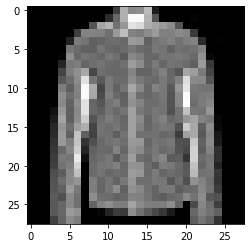

The above image (number 42435 in the dataset) is classified as a 'Pullover'.


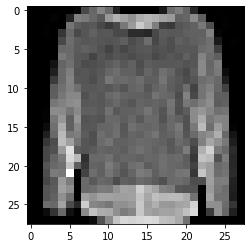

The above image (number 9979 in the dataset) is classified as a 'Sandal'.


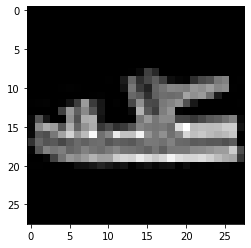

In [5]:
indexes = [random.randint(0, len(X_train)) for _ in range(IMAGES_TO_DISPLAY)]
for index in indexes:
    print("The above image (number {} in the dataset) is classified as a '{}'.".format(index, CLASSES_NAMES[y_train[index]]))

    pixels = X_train[index]
    display_image(pixels)

In [6]:
sns.set(rc={'figure.figsize':(15, 5)})

def plot_labels_distribution(labels: np.array) -> None:
    string_labels = [CLASSES_NAMES[label] for label in labels]

    plot_train = sns.histplot(data=string_labels, shrink=0.9)
    pyplot.xlabel("Labels")
    pyplot.title("Distribution of Labels in Dataset")
    pyplot.show()


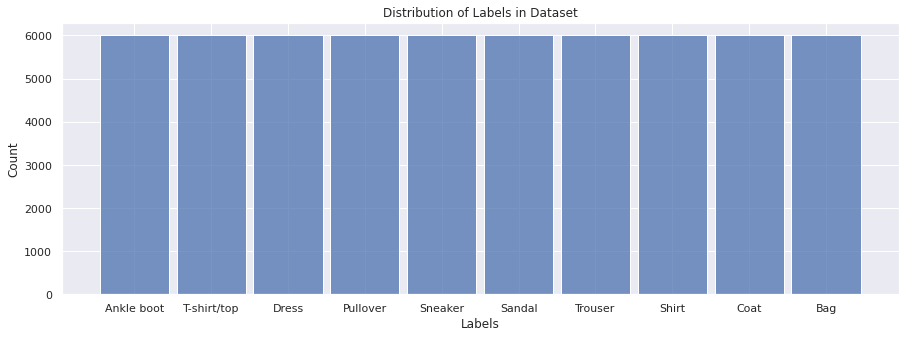

In [7]:
plot_labels_distribution(y_train)

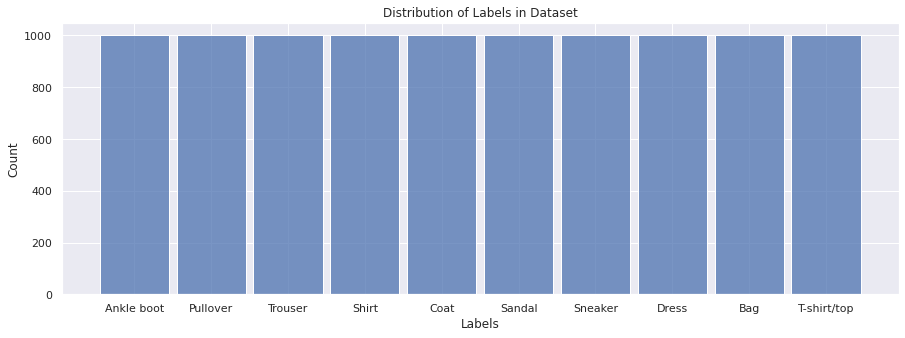

In [8]:
plot_labels_distribution(y_test)

## Preprocessing

In [9]:
X_train = X_train / MAX_PIXEL_VALUE
X_test = X_test / MAX_PIXEL_VALUE

In [10]:
X_validation = X_train[-VALIDATION_SIZE:]
X_train = X_train[:-VALIDATION_SIZE]

y_validation = y_train[-VALIDATION_SIZE:]
y_train = y_train[:-VALIDATION_SIZE]

## Network Training

In [11]:
model = keras.Sequential(
    [
        layers.Flatten(input_shape=(PIXELS_PER_DIMENSION, PIXELS_PER_DIMENSION), name="flatten"),
        layers.Dense(300, activation="relu", name="dense_1"),
        layers.Dense(100, activation="relu", name="dense_2"),
        layers.Dense(len(CLASSES_NAMES), activation="softmax", name="softmax"),
    ]
)
model.build()

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
softmax (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [13]:
weights, thresholds = model.layers[1].get_weights()
print("The weights of the first hidden layer are:\n\n{}\n".format(weights))
print("The thresholds of the first hidden layer are:\n\n{}".format(thresholds))

The weights of the first hidden layer are:

[[-0.06319258 -0.02533592  0.06785028 ...  0.06771782 -0.03979338
   0.05348372]
 [ 0.05930857  0.06057048  0.02353932 ... -0.05554974 -0.03127847
  -0.05056601]
 [ 0.02552832  0.05691692 -0.001655   ...  0.04089946 -0.04738872
   0.02057078]
 ...
 [ 0.00236568  0.00080929  0.05060509 ...  0.04942926  0.00394222
   0.05514079]
 [-0.03279179  0.06143199  0.05159016 ...  0.00086602 -0.00608566
   0.02978581]
 [ 0.00732804  0.00099523 -0.07235028 ... -0.0566521   0.05383328
   0.07246614]]

The thresholds of the first hidden layer are:

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [14]:
model.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), epochs=EPOCHS_COUNT, batch_size=len(X_train))

Epoch 1/50
1/1 [==============================] - 2s 2s/step - loss: 27.6657 - accuracy: 0.0767 - val_loss: 27.3457 - val_accuracy: 0.1366
Epoch 2/50
1/1 [==============================] - 0s 423ms/step - loss: 27.6649 - accuracy: 0.1381 - val_loss: 27.3453 - val_accuracy: 0.0872
Epoch 3/50
1/1 [==============================] - 0s 342ms/step - loss: 27.6644 - accuracy: 0.0897 - val_loss: 27.3452 - val_accuracy: 0.0880
Epoch 4/50
1/1 [==============================] - 0s 436ms/step - loss: 27.6644 - accuracy: 0.0901 - val_loss: 27.3451 - val_accuracy: 0.1210
Epoch 5/50
1/1 [==============================] - 0s 381ms/step - loss: 27.6642 - accuracy: 0.1233 - val_loss: 27.3449 - val_accuracy: 0.1312
Epoch 6/50
1/1 [==============================] - 0s 444ms/step - loss: 27.6640 - accuracy: 0.1324 - val_loss: 27.3446 - val_accuracy: 0.1316
Epoch 7/50
1/1 [==============================] - 0s 389ms/step - loss: 27.6638 - accuracy: 0.1326 - val_loss: 27.3445 - val_accuracy: 0.0901
Epoch 8/5

## Network Evaluation

[]

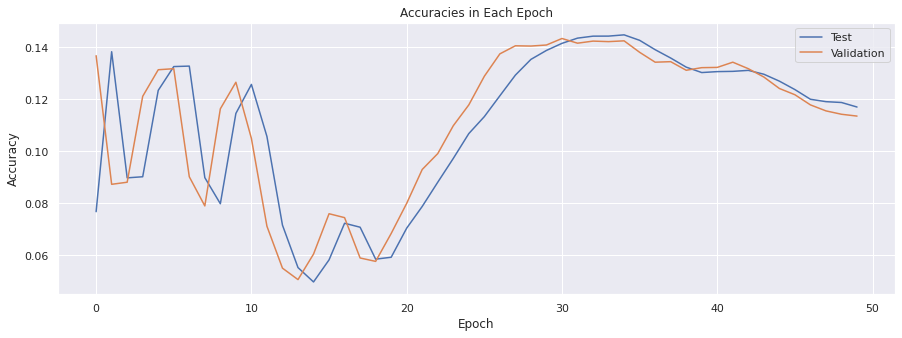

In [15]:
accuracies_per_epoch = list(zip(history.history["accuracy"], history.epoch))
validation_accuracies_per_epoch = list(zip(history.history["val_accuracy"], history.epoch))

accuracies_df = pd.DataFrame(accuracies_per_epoch, columns=["accuracy", "epoch"])
validation_accuracies_df = pd.DataFrame(validation_accuracies_per_epoch, columns=["accuracy", "epoch"])

first_plot = sns.lineplot(data=accuracies_df, x="epoch", y="accuracy", label="Test")
second_plot = sns.lineplot(data=validation_accuracies_df, x="epoch", y="accuracy", label="Validation")
pyplot.xlabel("Epoch")
pyplot.ylabel("Accuracy")
pyplot.title("Accuracies in Each Epoch")
pyplot.plot()

In [16]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=False)
print("The model accuracy over the test dataset is: {:.2f}.".format(accuracy))

The model accuracy over the test dataset is: 0.11.


The above image is a 'Ankle boot' and is classified as a 'Sandal'.


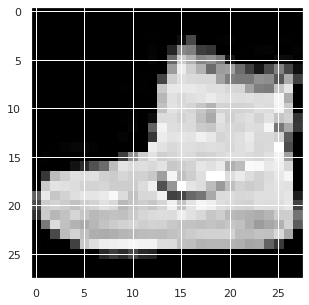

The above image is a 'Pullover' and is classified as a 'Bag'.


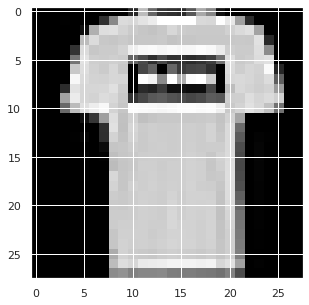

The above image is a 'Trouser' and is classified as a 'Shirt'.


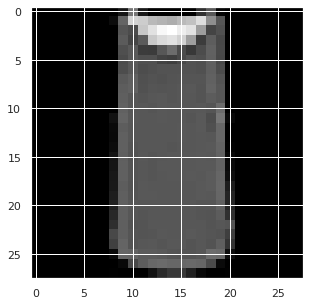

In [17]:
y_pred = model.predict([X_test[:IMAGES_TO_DISPLAY]])

for index in range(IMAGES_TO_DISPLAY):
    current_y_pred = y_pred[index].argmax()
    print("The above image is a '{}' and is classified as a '{}'.".format(CLASSES_NAMES[y_test[index]], CLASSES_NAMES[current_y_pred]))

    pixels = X_train[index]
    display_image(pixels)